<a href="https://colab.research.google.com/github/ZachGermain/DSPS_zgermain/blob/master/EC_Project/EC_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pylab as pl
import numpy as np
import sklearn as skl
from sklearn import preprocessing #sklearn does not automatically import subpackages
from sklearn import manifold
from sklearn import cluster

# **Data Opening and Preprocessing**

In [2]:
astDf = pd.read_csv("https://raw.githubusercontent.com/ZachGermain/DSPS_zgermain/master/EC_Project/asteroidsBelt.csv")
astDf = astDf.set_index('id')
astDf.head()

,a,e,i,spec_B
id,,,,
a0000001,2.769165,0.076009,10.594067,C
a0000002,2.772466,0.230337,34.836234,B
a0000003,2.669150,0.256942,12.988919,Sk
a0000004,2.361418,0.088721,7.141771,V
a0000005,2.574249,0.191095,5.366988,S


In [3]:
astDf.shape

(1256, 4)

In [4]:
astDf.describe()

,a,e,i
count,1256.000000,1256.000000,1256.000000
mean,2.668575,0.142122,8.732625
std,0.299855,0.071539,5.978991
min,1.817514,0.004735,0.264810
25%,2.415790,0.085149,4.625334
50%,2.727534,0.139018,7.455825
75%,2.795298,0.188787,10.967992
max,4.283402,0.598097,38.936411


In [5]:
set(astDf.spec_B)

{'A',
 'B',
 'C',
 'Cb',
 'Cg',
 'Cgh',
 'Ch',
 'D',
 'K',
 'L',
 'Ld',
 'O',
 'R',
 'S',
 'Sa',
 'Sk',
 'Sl',
 'Sq',
 'Sr',
 'T',
 'U',
 'V',
 'X',
 'Xc',
 'Xe',
 'Xk'}

In [6]:
for i in set(astDf.spec_B):
  print("{0}: {1}".format(i, list(astDf.spec_B).count(i)))

Xk: 39
X: 111
Sr: 11
Cb: 30
Sa: 29
A: 12
C: 139
D: 8
Cgh: 15
S: 348
Ch: 135
T: 12
L: 33
Sk: 12
Sq: 44
Xe: 24
Ld: 11
B: 56
Sl: 47
V: 35
O: 1
U: 1
K: 31
Cg: 9
R: 4
Xc: 59


## **Data Reduction**

Some data preprocessing: 
  Replacing transitional types with original types.
    Lets similar types be grouped together.
  Getting rid of types with less than 5% of the asteroids of the S-type as these are closer to outliers than clusters.

In [7]:
cTransitions = [ 'Cb', 'Cg', 'Cgh', 'Ch' ]
sTransitions = [ 'Sa', 'Sk', 'Sl', 'Sq', 'Sr' ]
xTransitions  = [ 'Xc', 'Xe', 'Xk' ]
lTransitions = [ 'Ld' ]

for c in cTransitions:
  astDf["spec_B"] = astDf["spec_B"].str.replace(c, 'C')

for s in sTransitions:
  astDf["spec_B"] = astDf["spec_B"].str.replace(s, 'S')

for x in xTransitions:
  astDf["spec_B"] = astDf["spec_B"].str.replace(x, 'X')

for l in lTransitions:
  astDf["spec_B"] = astDf["spec_B"].str.replace(l, 'L')

set(astDf.spec_B)

{'A', 'B', 'C', 'D', 'K', 'L', 'O', 'R', 'S', 'T', 'U', 'V', 'X'}

In [8]:
tinyTypes = [ 'A', 'D', 'O', 'R', 'T', 'U' ]

for t in tinyTypes:
  astDf = astDf[ astDf["spec_B"] != t ]

set(astDf.spec_B)

{'B', 'C', 'K', 'L', 'S', 'V', 'X'}

In [9]:
for i in set(astDf.spec_B):
  print("{0}: {1}".format(i, list(astDf.spec_B).count(i)))

L: 44
C: 328
K: 31
B: 56
S: 491
X: 233
V: 35


In [10]:
astDf.head()

,a,e,i,spec_B
id,,,,
a0000001,2.769165,0.076009,10.594067,C
a0000002,2.772466,0.230337,34.836234,B
a0000003,2.669150,0.256942,12.988919,S
a0000004,2.361418,0.088721,7.141771,V
a0000005,2.574249,0.191095,5.366988,S


In [11]:
astDf.describe()

,a,e,i
count,1218.000000,1218.000000,1218.000000
mean,2.664952,0.142884,8.695008
std,0.293857,0.071732,5.954243
min,1.817514,0.004735,0.264810
25%,2.414451,0.085559,4.620034
50%,2.726381,0.140029,7.459324
75%,2.793944,0.190248,10.897491
max,4.283402,0.598097,38.936411


The reduction does not seem to have a significant effect on the data distribution.

## **Separate Data into Orbital Parameters and Taxonomy**

In [12]:
taxonomy = astDf[['spec_B']]
taxonomy.head()

,spec_B
id,
a0000001,C
a0000002,B
a0000003,S
a0000004,V
a0000005,S


In [13]:
astDf = astDf.drop(labels = 'spec_B', axis = 1)
astDf.head()

,a,e,i
id,,,
a0000001,2.769165,0.076009,10.594067
a0000002,2.772466,0.230337,34.836234
a0000003,2.669150,0.256942,12.988919
a0000004,2.361418,0.088721,7.141771
a0000005,2.574249,0.191095,5.366988


## **Scaling Data**

In [14]:
astScaled = preprocessing.scale(astDf)
astScaled.mean(0).round(2), astScaled.std(0)

(array([ 0., -0.,  0.]), array([1., 1., 1.]))

# **Data Visualization**

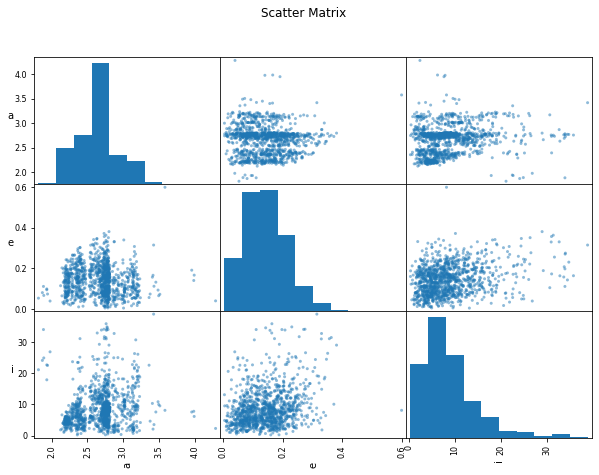

In [15]:
axs = pd.plotting.scatter_matrix(astDf, figsize=(10,7));
for x in range(len(axs)):
    for y in range(len(axs)):
        if x == len(axs) - 1:
            #to make x axis name vertical  
            axs[x, y].xaxis.label.set_rotation(90);
        if y == 0:    
            axs[x, y].yaxis.label.set_rotation(0);
pl.suptitle("Scatter Matrix");

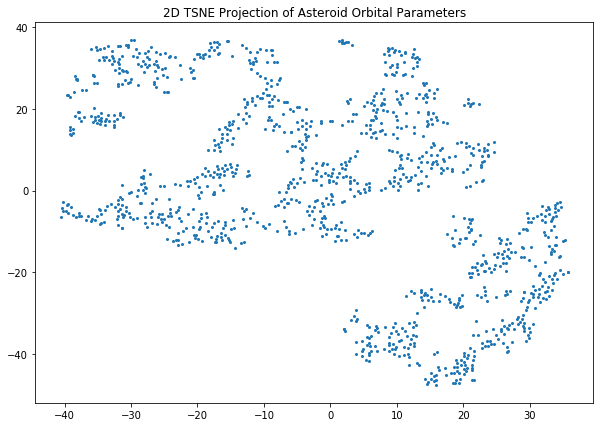

In [16]:
twodproj = manifold.TSNE(random_state = 7).fit_transform(astScaled)
pl.figure(figsize = (10,7))
pl.scatter(twodproj[:,0], twodproj[:,1], s = 4)
pl.title("2D TSNE Projection of Asteroid Orbital Parameters");

# **Clustering**

## **Finding Cluster Centers**

In [17]:
numClusters = len(set(taxonomy.spec_B))
numClusters

7

In [18]:
astScaled.shape

(1218, 3)

In [19]:
clusterCenter = np.zeros((numClusters, 3))
clusterTaxonLabels = set(taxonomy.spec_B)

for taxon, clustNum in zip(clusterTaxonLabels, range(0, numClusters)):
  indices = np.flatnonzero(taxonomy['spec_B'] == taxon)
  a = astScaled[indices, 0]
  e = astScaled[indices, 1]
  i = astScaled[indices, 2]
  clusterCenter[clustNum, 0] = a.mean()
  clusterCenter[clustNum, 1] = e.mean()
  clusterCenter[clustNum, 2] = i.mean()

clusterCenter, clusterTaxonLabels

(array([[ 0.13618196, -0.25535732, -0.04690076],
        [ 0.36613307,  0.15410882,  0.0821883 ],
        [ 0.62471205, -0.2275397 ,  0.17526339],
        [ 0.28182171,  0.42539131,  0.46805252],
        [-0.41748233, -0.0475098 , -0.19375695],
        [ 0.34001336, -0.05983133,  0.23376257],
        [-1.01345805, -0.5374898 , -0.45343574]]),
 {'B', 'C', 'K', 'L', 'S', 'V', 'X'})

Interestingly enough, one can see significant differences of the means between clusters

## **K-Means Clustering**